In [132]:
import numpy as np 
import cvxpy as cp 
import matplotlib.pyplot as plt 


In [167]:
def gamma(x,y,theta):
    return x*np.cos(theta)+y*np.sin(theta)
np.random.seed(0)
n = 40
theta_tar = 15*np.pi/180 
delta = 15*np.pi/180 
N = 400 
x = 30*np.random.rand(n,1)
y = 30*np.random.rand(n,1)
b = np.array([1,0])
thetas = np.linspace(theta_tar+delta, 2*np.pi+theta_tar-delta, N)
constrain = [] 
w = cp.Variable(2*n)
t = cp.Variable(1)
a = 0 
theta_2 = np.append(thetas,theta_tar)
len_theta = len(theta_2)-1 
for i,theta in enumerate(theta_2) :
    gamma_i = gamma(x,y,theta)
    cos_gamma_i = np.cos(gamma_i)
    sin_gamma_i = np.sin(gamma_i)
    A = np.vstack(
        (np.hstack((cos_gamma_i.T,-sin_gamma_i.T)),np.hstack((sin_gamma_i.T,cos_gamma_i.T))))
    if i != len_theta:
        constrain +=[
            cp.norm(A@w) <= t
        ]
    else: 
        constrain+=[
            A@w == b 
        ]
prob = cp.Problem(cp.Minimize(t), constrain)
result = prob.solve()
print(result)

0.008794047511866751


## Plot the $|(G(\theta)|$



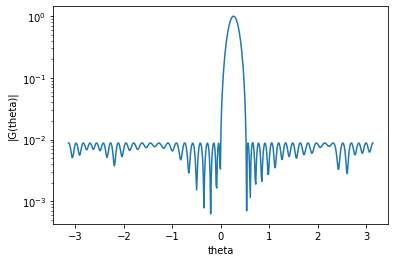

In [165]:

thetas = np.linspace(-np.pi,np.pi,500)
w_complex = np.zeros((n,1),dtype = np.complex128)
w_val = w.value.astype(np.complex128)
w_complex = w_val[np.arange(n)]
w_complex += 1j*w_val[np.arange(n,2*n)]
#print(x.shape)
#print(np.cos(thetas).shape)
G = w_complex@np.exp(1j*(x*np.cos(thetas)+y*np.sin(thetas)))
#plt.plot(thetas, np.abs(G))
plt.ylabel("|G(theta)|")
plt.xlabel('theta') 
plt.semilogy(thetas,np.abs(G))
